In [9]:
# good for you, remember to use[:] when copy array
from sklearn.metrics import mean_squared_error
import copy
def get_error(ground_truth,signalmat):
    # we want to try every possible signal order
    g=ground_truth.T
    s=signalmat.T
    l = len(s) # number of signals
    
    best_err =mean_squared_error(g,s)
    for j in range(l):        
        temp = copy.deepcopy(s[j])
        for i in range(j,l-1):
            s[i]=copy.deepcopy(s[i+1])
            s[i+1]=copy.deepcopy(temp)

            err = mean_squared_error(g,s)
            if err > best_err:
                best_err = err
    return best_err


In [10]:
truth = (np.array([[1,2,3],[4,7,8]])).T
my = (np.array([[4,6,7],[1,3,3.5]])).T
print(my)
error = get_error(truth, my)
print(error)
print(my)
print(truth)

[[ 4.   1. ]
 [ 6.   3. ]
 [ 7.   3.5]]
14.375
[[ 1.   4. ]
 [ 3.   6. ]
 [ 3.5  7. ]]
[[1 4]
 [2 7]
 [3 8]]


In [29]:
import copy
a = np.array([1, 2, 3])
b = copy.deepcopy(a)  # use b = a, b will always be a
                      # use b = a[:], b still is the same with a
a[2] = 5
print (a)
print (b)

[1 2 5]
[1 2 3]


In [112]:
a=[1,2,4]
a.extend ([5,6])
print(a)

[1, 2, 4, 5, 6]


In [11]:
import numpy as np
from sklearn.decomposition import FastICA, PCA
import pylab as pl
from amuse import amuse
from scipy.io import wavfile
from sklearn import preprocessing    
import matplotlib.pyplot as plt
#read sources
fs1, s1 = wavfile.read('si30.wav')
fs2, s2 = wavfile.read('Small-talk30.wav')


#5 sec of sources

s1 = s1[0:220500]
s2 = s2[0:220500]
s1=s1[:,0]
s2=s2[:,0]
S0 = np.c_[s1, s2]

#S0 = S0[~(S0==0).all(1)]
d=S0.std(axis=0)
S =S0/ d  

#s= preprocessing.normalize(s, norm='l2')
A = np.array([[10.2,12.5],[5.7,2.4]])  #Matrix mixture. Merges the sources

x = np.dot(S, A.T) #observed signal

amuse1 = amuse(x.T, 2, 1)
s_hat = (amuse1.sources).T #estimate sources. 1/8 size of the original signal
W = amuse1.W #separation matrix

ica = FastICA(n_components=2)
S_ica = ica.fit_transform(x)  # 重构信号
# PCA模型
pca = PCA(n_components=2)
S_pca = pca.fit_transform(x)  # 基于PCA的成分正交重构信号源

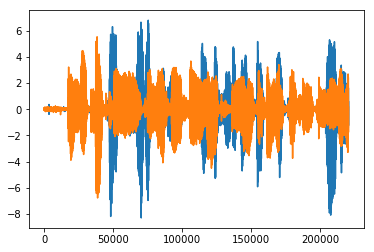

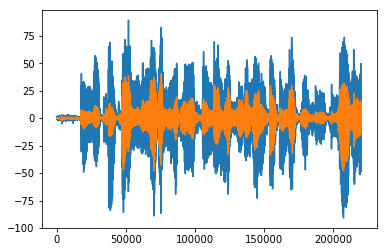

In [12]:
import matplotlib.pyplot as plt
plt.plot(S)

plt.show()
plt.plot(x)
plt.show()

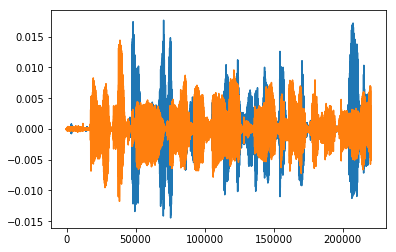

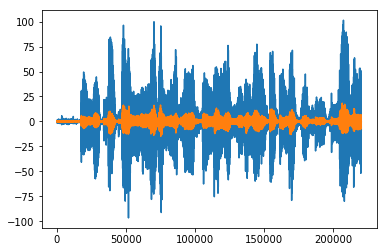

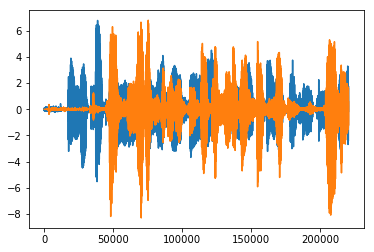

In [117]:
plt.plot(S_ica)
plt.show()
plt.plot(S_pca)
plt.show()
plt.plot(s_hat)
plt.show()

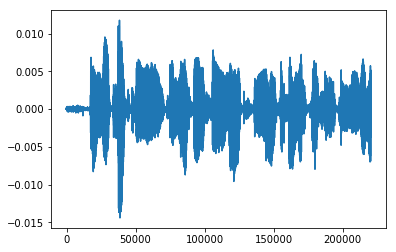

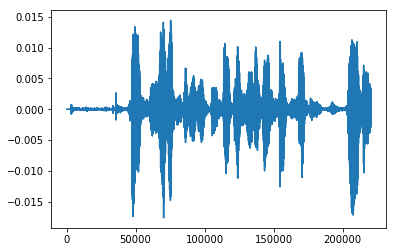

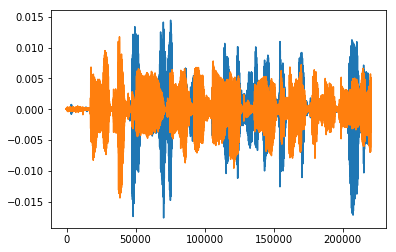

In [15]:
plt.plot(S_ica[:,1])
plt.show()
plt.plot(S_ica[:,0])
plt.show()
plt.plot(S_ica)
plt.show()

In [30]:
import math

print(get_error(S,S_ica))
print(get_error(S,S_pca))
#print(get_error(S,s_hat*math.e**(-6)))
print(get_error(S,s_hat))

0.999999176794
165.268470482
2.00719223023


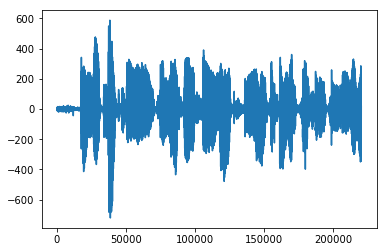

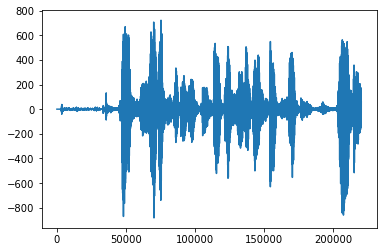

In [31]:
from scipy.io.wavfile import write

k=S_ica[:,0]*50000
kk=k.astype(np.int16)
write('g1.wav', fs1, kk)

b=S_ica[:,1]*50000
bb=b.astype(np.int16)
write('g2.wav', fs2, bb)
plt.plot(kk)

plt.show()
plt.plot(bb)

plt.show()


In [17]:
print(S_ica[51000:51010,1])
print(S_ica[51000:51010,0])

[-0.00218548 -0.00213097 -0.00214875 -0.00226532 -0.00233722 -0.00237269
 -0.00241799 -0.00240724 -0.00233886 -0.00226739]
[ -2.22828547e-03  -2.18132081e-03  -1.98964730e-03  -1.71423662e-03
  -1.35849708e-03  -9.22392388e-04  -4.52923501e-04   2.41496080e-06
   4.10295102e-04   7.07091938e-04]


In [18]:
print(s_hat.shape)

(220500, 2)


In [33]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print(y)
yinv = ifft(y)
print(yinv)


[ 4.50000000+0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1.0+0.j  2.0+0.j  1.0+0.j -1.0+0.j  1.5+0.j]


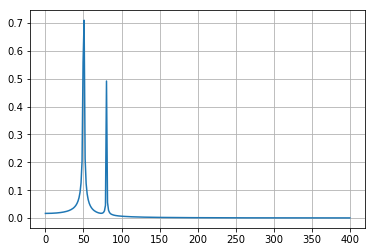

In [52]:
from scipy.fftpack import fft,rfft

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#yf = fft(y)
yf = np.fft.fft(y) # good
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [41]:
np.absolute(1.414 + 1.414j)

1.9996979771955563

In [56]:
np.fft.fft([0, 1, 0, 0])

array([ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j])

In [80]:
np.fft.rfft([0, 1, 0, 0,45,6,1,0])

array([ 53.00000000+0.j        , -48.53553391+4.53553391j,
        44.00000000-7.j        , -41.46446609+2.53553391j,  39.00000000+0.j        ])

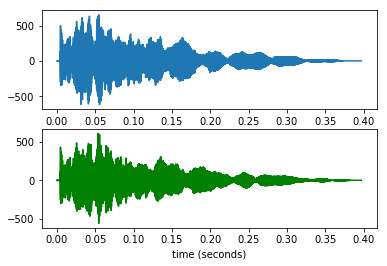

In [58]:
# -*- coding: utf-8 -*-
import wave
import pylab as pl
import numpy as np

# 打开WAV文档
f = wave.open(r"c:\WINDOWS\Media\ding.wav", "rb")

# 读取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 读取波形数据
str_data = f.readframes(nframes)
f.close()

#将波形数据转换为数组
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

# 绘制波形
pl.subplot(211) 
pl.plot(time, wave_data[0])
pl.subplot(212) 
pl.plot(time, wave_data[1], c="g")
pl.xlabel("time (seconds)")
pl.show()

C:\Users\Si\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


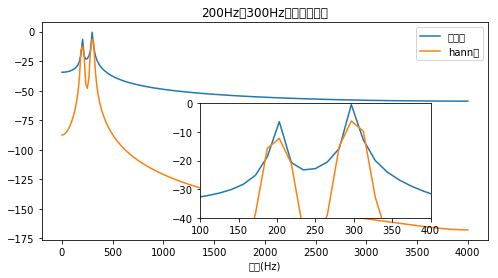

In [59]:
# -*- coding: utf-8 -*-
#用hann窗降低频谱泄漏
#
import numpy as np
import pylab as pl
import scipy.signal as signal

sampling_rate = 8000
fft_size = 512
t = np.arange(0, 1.0, 1.0/sampling_rate)
x = np.sin(2*np.pi*200*t)  + 2*np.sin(2*np.pi*300*t)

xs = x[:fft_size] 
ys = xs * signal.hann(fft_size, sym=0)

xf = np.fft.rfft(xs)/fft_size
yf = np.fft.rfft(ys)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
yfp = 20*np.log10(np.clip(np.abs(yf), 1e-20, 1e100))
pl.figure(figsize=(8,4))
pl.title(u"200Hz和300Hz的波形和频谱")
pl.plot(freqs, xfp, label=u"矩形窗")
pl.plot(freqs, yfp, label=u"hann窗")
pl.legend()
pl.xlabel(u"频率(Hz)")

a = pl.axes([.4, .2, .4, .4])
a.plot(freqs, xfp, label=u"矩形窗")
a.plot(freqs, yfp, label=u"hann窗")
a.set_xlim(100, 400)
a.set_ylim(-40, 0)
pl.show()

C:\Users\Si\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


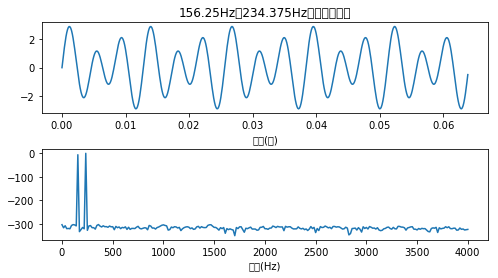

In [60]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl

sampling_rate = 8000
fft_size = 512
t = np.arange(0, 1.0, 1.0/sampling_rate)
x = np.sin(2*np.pi*156.25*t)  + 2*np.sin(2*np.pi*234.375*t)
xs = x[:fft_size]
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
pl.figure(figsize=(8,4))
pl.subplot(211)
pl.plot(t[:fft_size], xs)
pl.xlabel(u"时间(秒)")
pl.title(u"156.25Hz和234.375Hz的波形和频谱")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"频率(Hz)")
pl.subplots_adjust(hspace=0.4)
pl.show()

In [79]:
np.sin(2*np.pi*234.375*506)

-1.0

In [67]:
np.sin(0)

0.0

[ 0.          0.12822827  0.25645654  0.38468481  0.51291309  0.64114136
  0.76936963  0.8975979   1.02582617  1.15405444  1.28228272  1.41051099
  1.53873926  1.66696753  1.7951958   1.92342407  2.05165235  2.17988062
  2.30810889  2.43633716  2.56456543  2.6927937   2.82102197  2.94925025
  3.07747852  3.20570679  3.33393506  3.46216333  3.5903916   3.71861988
  3.84684815  3.97507642  4.10330469  4.23153296  4.35976123  4.48798951
  4.61621778  4.74444605  4.87267432  5.00090259  5.12913086  5.25735913
  5.38558741  5.51381568  5.64204395  5.77027222  5.89850049  6.02672876
  6.15495704  6.28318531]
[  1.00000000e+00 +0.00000000e+00j   2.51861168e+01 +1.58457616e+00j
  -3.48216985e-01 -4.39900352e-02j  -1.27741791e-01 -2.43680499e-02j
  -6.66955629e-02 -1.71245100e-02j  -4.06296415e-02 -1.32013708e-02j
  -2.70046679e-02 -1.06919044e-02j  -1.89679984e-02 -8.92566251e-03j
  -1.38269012e-02 -7.60140326e-03j  -1.03404651e-02 -6.56225872e-03j
  -7.87012017e-03 -5.71797701e-03j  -6.059347

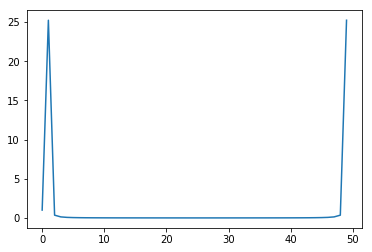

C:\Users\Si\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


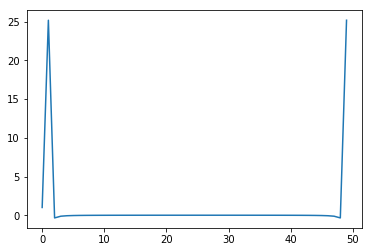

In [85]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,2*np.pi,50)
print(x)
wave=np.cos(x)
transformed=np.fft.fft(wave) #傅里叶变换
print(transformed)
plt.plot(np.abs(transformed)) #绘制变换后的信号
plt.show()
plt.plot(transformed) #绘制变换后的信号
plt.show()

C:\Users\Si\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


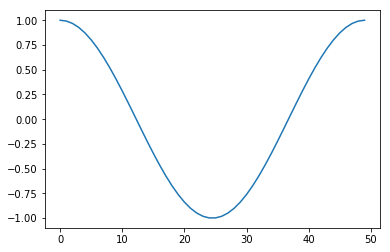

In [86]:
plt.plot(np.fft.ifft(transformed))
plt.show()

C:\Users\Si\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


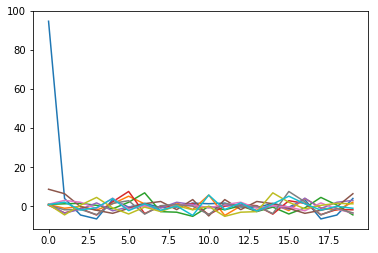

In [89]:
x=np.random.rand(20,10)
transformed=np.fft.fft2(x)
plt.plot(transformed)
plt.show()